# Chapter 10 Problems 

> of "<ins>Modern Compressible Flow With Historical Perspective</ins>", Third Edition, John D. Anderson Jr

In [1]:
import pint
import pygasflow
from pygasflow.solvers import *
import numpy as np

ureg = pint.UnitRegistry()
# use "~P" to format units with unicode
ureg.formatter.default_format = "~"
# let pygasflow knows which UnitRegistry to use
pygasflow.defaults.pint_ureg = ureg
# dictionary results offers improved code readability
pygasflow.defaults.solver_to_dict = True

# shorcuts for conveniance
kg = ureg.kg
K = ureg.K
degC = ureg.degC
J = ureg.J
m = ureg.m
atm = ureg.atm
Pa = ureg.pascal
sec = ureg.s
deg = ureg.deg
Q_ = ureg.Quantity

gamma = 1.4
R = 287.05 * J / (kg * K)

## P 10.1

In [2]:
M_inf = 2
theta_c = 15 * deg
p1 = 1 * atm
T1 = 290 * K
rho1 = (p1 / (R * T1)).to("kg/m**3")

In [3]:
shock = conical_shockwave_solver(M_inf, "theta_c", theta_c)
shock.show()

key        quantity       
--------------------------
mu         Mu                  2.00000000
mc         Mc                  1.70686796
theta_c    theta_c [deg]      15.00000000
beta       beta [deg]         33.91469753
delta      delta [deg]         4.57913858
pr         pd/pu               1.28614663
dr         rhod/rhou           1.19636349
tr         Td/Tu               1.07504671
tpr        p0d/p0u             0.99837756
pc_pu      pc/pu               1.56629305
rhoc_rhou  rho_c/rhou          1.37718896
Tc_Tu      Tc/Tu               1.13731165


### (a)

In [4]:
beta = shock["beta"]
beta

<Quantity(33.9146975, 'degree')>

### (b)

In [5]:
p1 = 1 * atm
T1 = 290 * K
rho1 = (p1 / (R * T1)).to("kg / m**3")
rho1

<Quantity(1.21719753, 'kilogram / meter ** 3')>

In [6]:
p2 = shock["pr"] * p1
p2

<Quantity(1.28614663, 'standard_atmosphere')>

In [7]:
T2 = shock["tr"] * T1
T2

<Quantity(311.763546, 'kelvin')>

In [8]:
rho2 = shock["dr"] * rho1
rho2

<Quantity(1.45621069, 'kilogram / meter ** 3')>

In [9]:
M2 = shockwave_solver("mu", M_inf, "theta", shock["delta"])["md"]
M2

np.float64(1.8362269055556388)

### (c)

In [10]:
pc = shock["pc_pu"] * p1
pc

<Quantity(1.56629305, 'standard_atmosphere')>

In [11]:
Tc = shock["Tc_Tu"] * T1
Tc

<Quantity(329.820379, 'kelvin')>

In [12]:
rhoc = shock["rhoc_rhou"] * rho1
rhoc

<Quantity(1.676311, 'kilogram / meter ** 3')>

## P 10.2

### for a cone

In [28]:
from pygasflow.interactive.diagrams import ConicalShockDiagram
ConicalShockDiagram().show_figure()

In [14]:
from pygasflow.shockwave import max_theta_c_from_mach
from scipy.optimize import bisect

M_inf = 2
theta_c = 15 * deg

def func(M, theta_target):
    _, theta_c_max, _ = max_theta_c_from_mach(M, gamma)
    return theta_c_max - theta_target

M = bisect(func, a=1+1e-05, b=M_inf, args=(theta_c.magnitude))
M

1.1191542916165758

Detachment happens for $M < 1.1191542916165758$.

### for a wedge

In [29]:
from pygasflow.interactive.diagrams import ObliqueShockDiagram
ObliqueShockDiagram().show_figure()

In [16]:
from pygasflow.shockwave import max_theta_from_mach
from scipy.optimize import bisect

M_inf = 2
theta_c = 15 * deg

def func(M, theta_target):
    theta_max = max_theta_from_mach(M, gamma)
    return theta_max - theta_target

M = bisect(func, a=1+1e-05, b=M_inf, args=(theta_c.magnitude))
M

1.6142820055343785

Detachment happens for $M < 1.6142820055343785$.

## P 10.3

In [17]:
theta_c = 15 * deg
p_inf = 1 * atm
T_inf = 290 * K
rho_inf = (p_inf / (R * T_inf)).to("kg/m**3")

$$
C_{D} = \frac{D}{q_{inf} A_{b}}
$$

In [18]:
M_inf = np.linspace(1.5, 7, 10)
shock = conical_shockwave_solver(M_inf, "theta_c", theta_c)
shock.show()

key        quantity       
--------------------------
mu         Mu                  1.50000000     2.11111111     2.72222222     3.33333333     3.94444444     4.55555556     5.16666667     5.77777778     6.38888889     7.00000000
mc         Mc                  1.27072629     1.80016926     2.29347872     2.75349994     3.17963867     3.57165457     3.93004456     4.25599373     4.55121833     4.81778887
theta_c    theta_c [deg]      15.00000000    15.00000000    15.00000000    15.00000000    15.00000000    15.00000000    15.00000000    15.00000000    15.00000000    15.00000000
beta       beta [deg]         45.03026984    32.39931734    26.84465529    23.79812548    21.92451816    20.68444478    19.81985693    19.19291942    18.72400453    18.36431587
delta      delta [deg]         2.80388765     4.96695670     6.87069448     8.33449443     9.42354578    10.23421622    10.84493203    11.31219851    11.67548013    11.96228586
pr         pd/pu               1.14722014     1.32613297     

In [19]:
pc = shock["pc_pu"] * p_inf
pc

Magnitude,[1.3780733219251478 1.615290767532153 1.9263224149410585 2.3065538292079126 2.7563176271935834 3.2763670844886 3.8673808351142953 4.52989659160189 5.264324126219128 6.070970594438352]
Units,atm


In [20]:
# NOTE: I'm going to use sympy + pint together in order to check dimensions as I compute things
import sympy as sp
# chord length
c = Q_(sp.symbols("c", positive=True, real=True), m)
# length of the oblique side
l = c / sp.cos(theta_c.to("radian").magnitude)
# radius of the cone
r = l * sp.sin(theta_c.to("radian").magnitude)

In [21]:
# surface area of the base of the cone
Ab = sp.pi * r**2
Ab

<Quantity(0.0717967697244908*pi*c**2, 'meter ** 2')>

In [22]:
# surface area of the cone
Ac = sp.pi * r * l
Ac

<Quantity(0.277401416484059*pi*c**2, 'meter ** 2')>

In [23]:
D = pc * Ac * sp.cos(theta_c.to("radian").magnitude) - p_inf * Ab
D = D.to("N")
D

Magnitude,[30139.8167444177*pi*c**2 36580.2589879646*pi*c**2 45024.7532616738*pi*c**2 55348.017878665*pi*c**2 67559.0833707194*pi*c**2 81678.4011339047*pi*c**2 97724.3960492736*pi*c**2 115711.666986197*pi*c**2 135651.339242044*pi*c**2 157551.752073121*pi*c**2]
Units,N


In [24]:
a_inf = np.sqrt(gamma * R * T_inf).to("m/s")
V_inf = a_inf * M_inf
V_inf

Magnitude,[512.0743842451016 720.6972815301431 929.3201788151845 1137.9430761002259 1346.5659733852672 1555.1888706703085 1763.8117679553502 1972.4346652403917 2181.057562525433 2389.680459810474]
Units,m/s


In [25]:
q_inf = rho_inf * V_inf**2 / 2
q_inf

Magnitude,[159586.87499999994 316108.9814814815 525607.800925926 788083.3333333334 1103535.5787037036 1471964.5370370366 1893370.2083333335 2367752.592592593 2895111.689814815 3475447.4999999995]
Units,kg/(m s2)


In [26]:
Cd = D / (q_inf * Ab)
Cd = Cd.to("")
Cd

<Quantity([2.63050136760627 1.61177730228564 1.19312139720313 0.978194067556690
 0.852692619429496 0.772867376823472 0.718890179395168 0.680668925858093
 0.652610200866927 0.631404393868821], 'dimensionless')>

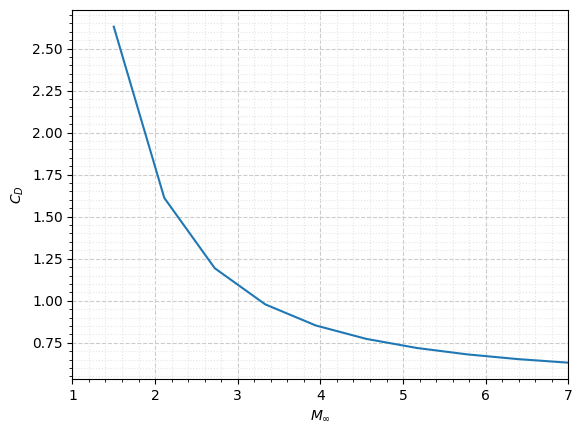

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(M_inf, Cd.magnitude)
ax.set_xlabel(r"$M_{\infty}$")
ax.set_ylabel(r"$C_{D}$")
ax.set_xlim(1, M_inf.max())
ax.grid(visible=True, which="both")
ax.grid(which="major", linestyle="--", color="0.8")
ax.grid(which="minor", linestyle=":", color="0.9")
ax.minorticks_on()
plt.show()